In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from skimage.transform import resize
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

#Load dataset
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

#Create convolutional neural network
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()


Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)         

In [2]:
#Shape of input feature array
print('x_train shape:', x_train.shape)

x_train shape: (50000, 32, 32, 3)


In [3]:
#shape of label array
print('y_train shape:', y_train.shape)

y_train shape: (50000, 1)


In [4]:
#one hot encoding to check what class image belongs to
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [5]:
#compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
#run training
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=32, epochs=20, 
           validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 206s 5ms/step - loss: 1.5849 - accuracy: 0.4206 - val_loss: 1.2097 - val_accuracy: 0.5767
Epoch 2/20
40000/40000 [==============================] - 204s 5ms/step - loss: 1.1501 - accuracy: 0.5877 - val_loss: 0.9953 - val_accuracy: 0.6534
Epoch 3/20
40000/40000 [==============================] - 203s 5ms/step - loss: 0.9983 - accuracy: 0.6456 - val_loss: 0.8992 - val_accuracy: 0.6802
Epoch 4/20
40000/40000 [==============================] - 27673s 692ms/step - loss: 0.9098 - accuracy: 0.6791 - val_loss: 0.8276 - val_accuracy: 0.7079
Epoch 5/20
40000/40000 [==============================] - 212s 5ms/step - loss: 0.8332 - accuracy: 0.7075 - val_loss: 0.7744 - val_accuracy: 0.7312
Epoch 6/20
40000/40000 [==============================] - 215s 5ms/step - loss: 0.7779 - accuracy: 0.7268 - val_loss: 0.7380 - val_accuracy: 0.7463
Epoch 7/20
40000/40000 [==============================] - 

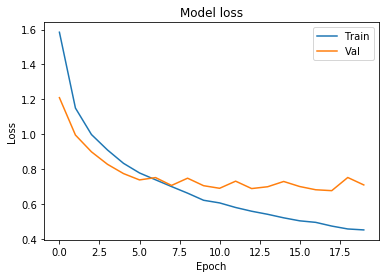

In [6]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


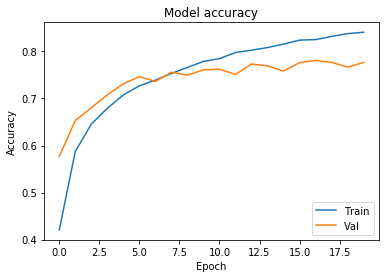

In [7]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [11]:
#save model
model.save('my_cifar10_model.h5')

In [12]:
#read in image and resize
my_image = plt.imread("cat.jpg")
my_image_resized = resize(my_image, (32,32,3))

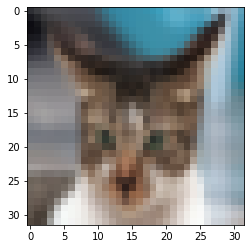

In [13]:
img = plt.imshow(my_image_resized)

In [14]:
#probablility prediction
probabilities = model.predict(np.array( [my_image_resized,] ))
probabilities

array([[1.2631408e-05, 1.0468762e-12, 3.0079836e-04, 9.8304635e-01,
        1.4735580e-03, 1.5086506e-02, 5.6351440e-05, 2.3828024e-05,
        2.2015000e-08, 3.6681100e-09]], dtype=float32)

In [15]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])

Most likely class: cat -- Probability: 0.98304635
Second most likely class: dog -- Probability: 0.015086506
Third most likely class: deer -- Probability: 0.001473558


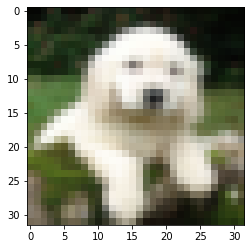

In [17]:
my_image = plt.imread("dog.png")
my_image_resized = resize(my_image, (32,32,3))
img = plt.imshow(my_image_resized)

In [18]:
probabilities = model.predict(np.array( [my_image_resized,] ))
probabilities

array([[9.4642329e-11, 9.3992645e-09, 1.9462584e-06, 3.3711314e-09,
        2.3945193e-13, 9.9999726e-01, 3.1823523e-11, 8.7787589e-07,
        8.7942761e-13, 3.2530961e-10]], dtype=float32)

In [19]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])

Most likely class: dog -- Probability: 0.99999726
Second most likely class: bird -- Probability: 1.9462584e-06
Third most likely class: horse -- Probability: 8.778759e-07
